# Captsone project for the IBM Data Science Professional Certificate 

(https://www.coursera.org/professional-certificates/ibm-data-science?#courses)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Hello, Capstone Project Course!")

Hello, Capstone Project Course!


In [3]:
!conda install -c anaconda seaborn -y
import seaborn as sb
print("Seaborn installed successfully!")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [4]:
# The code was removed by Watson Studio for sharing.

CSV read into dataframe


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Data Acquisition and Cleaning

In [5]:
# drop the column of PEDROWNOTGRNT due to missing 97.6% of values and drop SPEEDING due to too many missing values.
# drop INTKEY, INATTENTIONIND, and STATUS due to irrelevance.
dfw = df.drop(['PEDROWNOTGRNT', 'INTKEY', 'INATTENTIONIND', 'SPEEDING', 'STATUS'], axis = 1)
# drop the rows containing NaN values for the following columns.
dfw.dropna(subset=['X', 'Y', 'ADDRTYPE', 'LOCATION', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLDESC', 'SDOTCOLNUM'], axis = 0, inplace = True)
# drop EXCEPTRSNCODE and EXCEPTRSNDESC columns as missing 96.46% and 99.99% of values respectively
dfw.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC'], axis = 1, inplace = True)
dfw.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOTCOLNUM',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

In [6]:
# create a new dataframe on which to run the models
dfm = dfw.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'LOCATION', 'SEVERITYDESC', 'INCDATE', 'INCDTTM', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'ST_COLCODE', 'ST_COLDESC', 'SDOT_COLDESC', 'SDOT_COLCODE', 'ADDRTYPE', 'UNDERINFL'], axis = 1)

In [11]:
# drop the pesky X and Y columns... Finally
dfm.drop(['X', 'Y'], axis = 1, inplace = True)
# drop the duplicate SEVERITYCODE column named SEVERITYCODE.1
dfm.drop(['SEVERITYCODE.1'], axis = 1, inplace = True)
dfm.shape

KeyError: "['X' 'Y'] not found in axis"

In [12]:
# filter out the rows in which there are more than 10 persons.
dfm1 = dfm[dfm['PERSONCOUNT'] < 11]
dfm1.shape

(109264, 10)

In [13]:
# filter out the rows in which there are more than 3 pedestrians. 
dfm2 = dfm1[dfm1['PEDCOUNT'] < 4]
dfm2.shape

(109260, 10)

In [14]:
dfm2.groupby(['PERSONCOUNT', 'SEVERITYCODE'])['SEVERITYCODE'].count()

PERSONCOUNT  SEVERITYCODE
0            1                 171
             2                  70
1            1                4654
             2                1603
2            1               50072
             2               15860
3            1               13078
             2                7975
4            1                5048
             2                3781
5            1                2213
             2                1836
6            1                 845
             2                 841
7            1                 287
             2                 394
8            1                 150
             2                 175
9            1                  51
             2                  76
10           1                  32
             2                  48
Name: SEVERITYCODE, dtype: int64

In [15]:
dfm2.columns

Index(['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')

In [16]:
dfm2.isnull().sum()

SEVERITYCODE     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
dtype: int64

In [17]:
dfm2.head()

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
1,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight
4,2,Angles,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight
6,1,Angles,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight
8,1,Parked Car,2,0,0,2,Mid-Block (not related to intersection),Clear,Dry,Daylight


## 3. Exploratory Data Analysis

In [ ]:
# 3.2 plot severity vs lighting conditions
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "LIGHTCOND", hue = "SEVERITYCODE", data = dfm2)
plt.title('Lighting Conditions vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Lighting Conditions', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 8.7, "Figure 2: Lighting conditions plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (50, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.3 plot severity vs weather conditions
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "WEATHER", hue = "SEVERITYCODE", data = dfm2)
plt.title('Weather Conditions vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Weather Conditions', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 11, "Figure 3: Weather conditions plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (50, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.4 plot severity vs road conditions
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "ROADCOND", hue = "SEVERITYCODE", data = dfm2)
plt.title('Road Conditions vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Road Conditions', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 10, "Figure 4: Road conditions plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (50, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.5 plot severity vs collision type
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "COLLISIONTYPE", hue = "SEVERITYCODE", data = dfm2)
plt.title('Collision Type vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Collision Type', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 11, "Figure 5: Collision type plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (50, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.6 plot severity vs junction type
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "JUNCTIONTYPE", hue = "SEVERITYCODE", data = dfm2)
plt.title('Junction Type vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Junction Type', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 6.5, "Figure 6: Junction type plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (50, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.7.1 plot severity vs number of vehicles between 1 and 3
dfvc = dfm2.loc[(dfm2['VEHCOUNT'] > 0) & (dfm2['VEHCOUNT'] < 4)]
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "VEHCOUNT", hue = "SEVERITYCODE", data = dfvc)
plt.title('Number of Vehicles vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Number of Vehicles', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 3, "Figure 7.1: Number of vehicles type plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (50, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.7.2 plot severity vs number of vehicles between 4 and 6
dfvc = dfm2.loc[(dfm2['VEHCOUNT'] > 3) & (dfm2['VEHCOUNT'] < 7)]
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "VEHCOUNT", hue = "SEVERITYCODE", data = dfvc)
plt.title('Number of Vehicles vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Number of Vehicles', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 3, "Figure 7.2: Number of vehicles type plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (40, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.7.3 plot severity vs number of vehicles between 7 and 11
dfvc = dfm2.loc[(dfm2['VEHCOUNT'] > 6) & (dfm2['VEHCOUNT'] < 12)]
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "VEHCOUNT", hue = "SEVERITYCODE", data = dfvc)
plt.title('Number of Vehicles vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Number of Vehicles', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 5.4, "Figure 7.3: Number of vehicles type plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if np.isnan(width):
        continue
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (20, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.8 plot severity vs number of people 
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "PERSONCOUNT", hue = "SEVERITYCODE", data = dfm2)
plt.title('Number of People vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Number of People', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 12, "Figure 8: Number of people plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (50, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
# 3.9 plot severity vs number of pedestrians
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
ax = sb.countplot(y = "PEDCOUNT", hue = "SEVERITYCODE", data = dfm2)
plt.title('Number of Pedestrians vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Number of Pedestrians', fontsize = 24)
plt.tick_params(labelsize=18);
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right')
plt.text(0, 4, "Figure 9: Number of pedestrians plotted against the number of collisions grouped by severity", fontsize = 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if np.isnan(width):
        continue
    ax.annotate(int(width),
                ((x + width), y + height/2),
                fontsize = 18, 
                textcoords = 'offset points',
                xytext = (50, 0),
                color = '#000000',
                ha = 'right',
                va = 'center')

In [ ]:
dfm2.dtypes
dfm2.columns

## 4. Predictive Modeling

### 4.1 Data Wrangling

In [18]:
# Converting categorical variables to quantitative variables
dummy_collisiontype = pd.get_dummies(dfm2["COLLISIONTYPE"])
dummy_junctiontype  = pd.get_dummies(dfm2["JUNCTIONTYPE"])
dummy_weather = pd.get_dummies(dfm2["WEATHER"])
dummy_roadcond = pd.get_dummies(dfm2["ROADCOND"])
dummy_lightcond = pd.get_dummies(dfm2["LIGHTCOND"])

In [19]:
# merging data from dummies into the dataframe
dfm3 = pd.concat([dfm2, dummy_collisiontype], axis = 1)
dfm3 = pd.concat([dfm3, dummy_junctiontype], axis = 1)
dfm3 = pd.concat([dfm3, dummy_weather], axis = 1)
dfm3 = pd.concat([dfm3, dummy_roadcond], axis = 1)
dfm3 = pd.concat([dfm3, dummy_lightcond], axis = 1)

In [20]:
# dropping original categorical variable columns
dfm3.drop("COLLISIONTYPE", axis = 1, inplace = True)
dfm3.drop("JUNCTIONTYPE", axis = 1, inplace = True)
dfm3.drop("WEATHER", axis = 1, inplace = True)
dfm3.drop("ROADCOND", axis = 1, inplace = True)
dfm3.drop("LIGHTCOND", axis = 1, inplace = True)

dfm3.shape

(109260, 48)

In [21]:
dfm3.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'Angles', 'Cycles', 'Head On', 'Left Turn', 'Other', 'Parked Car',
       'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast',
       'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Unknown', 'Dry', 'Ice', 'Oil', 'Other', 'Sand/Mud/Dirt', 'Snow/Slush',
       'Standing Water', 'Unknown', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn',
       'Daylight', 'Dusk', 'Other', 'Unknown'],
      dtype='object')

In [22]:
# convert all columns to uppercase for consistency
dfm3.columns = map(str.upper, dfm3.columns)
dfm3.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'ANGLES', 'CYCLES', 'HEAD ON', 'LEFT TURN', 'OTHER', 'PARKED CAR',
       'PEDESTRIAN', 'REAR ENDED', 'RIGHT TURN', 'SIDESWIPE',
       'AT INTERSECTION (BUT NOT RELATED TO INTERSECTION)',
       'AT INTERSECTION (INTERSECTION RELATED)', 'DRIVEWAY JUNCTION',
       'MID-BLOCK (BUT INTERSECTION RELATED)',
       'MID-BLOCK (NOT RELATED TO INTERSECTION)', 'RAMP JUNCTION',
       'BLOWING SAND/DIRT', 'CLEAR', 'FOG/SMOG/SMOKE', 'OTHER', 'OVERCAST',
       'RAINING', 'SEVERE CROSSWIND', 'SLEET/HAIL/FREEZING RAIN', 'SNOWING',
       'UNKNOWN', 'DRY', 'ICE', 'OIL', 'OTHER', 'SAND/MUD/DIRT', 'SNOW/SLUSH',
       'STANDING WATER', 'UNKNOWN', 'WET', 'DARK - NO STREET LIGHTS',
       'DARK - STREET LIGHTS OFF', 'DARK - STREET LIGHTS ON', 'DAWN',
       'DAYLIGHT', 'DUSK', 'OTHER', 'UNKNOWN'],
      dtype='object')

### 4.2 Regression Models

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [24]:
Z = dfm3[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'ANGLES', 'CYCLES', 'HEAD ON', 'LEFT TURN', 'PARKED CAR',
       'PEDESTRIAN', 'REAR ENDED', 'RIGHT TURN', 'SIDESWIPE',
       'AT INTERSECTION (BUT NOT RELATED TO INTERSECTION)',
       'AT INTERSECTION (INTERSECTION RELATED)', 'DRIVEWAY JUNCTION',
       'MID-BLOCK (BUT INTERSECTION RELATED)',
       'MID-BLOCK (NOT RELATED TO INTERSECTION)', 'RAMP JUNCTION',
       'BLOWING SAND/DIRT', 'CLEAR', 'FOG/SMOG/SMOKE', 'OVERCAST',
       'RAINING', 'SEVERE CROSSWIND', 'SLEET/HAIL/FREEZING RAIN', 'SNOWING',
       'UNKNOWN', 'DRY', 'ICE', 'OIL', 'SAND/MUD/DIRT', 'SNOW/SLUSH',
       'STANDING WATER', 'WET', 'DARK - NO STREET LIGHTS',
       'DARK - STREET LIGHTS OFF', 'DARK - STREET LIGHTS ON', 'DAWN',
       'DAYLIGHT', 'DUSK']]
Y = dfm3[['SEVERITYCODE']]

#### Multiple Linear Regression

In [ ]:
LR = LinearRegression()
LR.fit(Z, Y)
print("The intercept is: ", LR.intercept_)
print("The coefficients are: ", LR.coef_)

In [ ]:
Yhat = LR.predict(Z)
mse = mean_squared_error(dfm3['SEVERITYCODE'], Yhat)
print("the R-squared is: ", LR.score(Z, Y))
print("The MSE is: ", mse)

In [ ]:
plt.figure(figsize = (12, 10))

ax1 = sb.distplot(dfm3['SEVERITYCODE'], hist = False, color = "green", label = "Actual Value")
sb.distplot(Yhat, hist = False, color = "purple", label = "Fitted Values", ax = ax1)

plt.title('Actual vs. Fitted Values for Severity')
plt.xlabel('Severity')
plt.ylabel('Proportion of Collisions')

plt.show()
plt.close()

#### Polynomial Regression

In [ ]:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
ypipe[0:4]

In [ ]:
mse = mean_squared_error(dfm3['SEVERITYCODE'], ypipe)
print("the R-squared is: ", LR.score(Z, Y))
print("The MSE is: ", mse)

In [ ]:
plt.figure(figsize = (12, 10))

ax1 = sb.distplot(dfm3['SEVERITYCODE'], hist = False, color = "green", label = "Actual Value")
sb.distplot(ypipe, hist = False, color = "purple", label = "Fitted Values", ax = ax1)

plt.title('Actual vs. Fitted Values for Severity')
plt.xlabel('Severity')
plt.ylabel('Proportion of Collisions')

plt.show()
plt.close()

#### Ridge Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

In [ ]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)

In [ ]:
yhat = RidgeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

In [ ]:
# select the alpha that minimizes the test error
parameters1 = [{'alpha': [0.001, 0.01, 0.1,1, 10, 100, 1000, 10000, 100000]}]
parameters1
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(Z, Y)
BestRR = Grid1.best_estimator_
print("the R-squared is: ", BestRR.score(x_test, y_test))

In [ ]:
mse = mean_squared_error(y_test, yhat)
print("the MSE is: ", mse)

### 4.3 Classification Models

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn import metrics

In [ ]:
Z = preprocessing.StandardScaler().fit(Z).transform(Z.astype(float))
Z[0:5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
np.mean([2, 3, 45, 5])

#### K-Nearest Neighbor

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

Train set Accuracy for  1  is:  0.7088138385502472
Test set Accuracy for  1  is:  0.6810818231740802
The Average for the two scores is:  0.6949478308621637


In [100]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

Train set Accuracy for  2  is:  0.7445428336079077
Test set Accuracy for  2  is:  0.7277594728171335
The Average for the two scores is:  0.7361511532125207


In [ ]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

In [ ]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

In [ ]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

In [ ]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

In [ ]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

In [ ]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

In [ ]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())
yhat = neigh.predict(X_test)
yhat[0:5]
train_score = metrics.accuracy_score(y_train, neigh.predict(X_train))
test_score = metrics.accuracy_score(y_test, yhat)
print("Train set Accuracy for ", k, " is: ", train_score)
print("Test set Accuracy for ", k, " is: ", test_score)
print("The Average for the two scores is: ", np.mean([train_score, test_score]))

#### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
!conda install -c conda-forge pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [48]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(Z, Y, test_size=0.3, random_state=3)
collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
collisionTree.fit(X_trainset, y_trainset)
predTree = collisionTree.predict(X_testset)
print("Decision's Tree Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Decision's Tree Accuracy:  0.7476356092501067


In [ ]:
dot_data = StringIO()
filename = "collisiontree.png"
featureNames = Z[0:43]
targetNames = dfm3["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(collisionTree, feature_names = featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [47]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print(f1_score(y_testset, yhat, average='weighted')) 
print(jaccard_similarity_score(y_testset, yhat))
print(log_loss(y_testset, yhat_prob))

0.7234743927640934
0.7583745194947831
0.4757728828062968


#### Logistic Regression

In [34]:
import pylab as pl
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss

In [35]:
Z = preprocessing.StandardScaler().fit(Z).transform(Z)
Z[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.47276628, -0.18423131, -0.15992516,  0.04180368, -0.46978749,
        -0.16032346, -0.10144727, -0.2829119 , -0.58639735, -0.18400078,
        -0.46728901, -0.12485177,  3.10580262, -0.09528151, -0.6987066 ,
        -0.26722193, -0.4095051 ,  1.10026244, -0.01815483, -0.01482254,
        -1.17956994, -0.05095957, -0.42599318,  2.140536  , -0.01003431,
        -0.02839133, -0.07437113, -0.27753595, -0.27192934, -0.26235327,
        -1.38919074, -0.09108426, -0.01711623, -0.02052295, -0.08012637,
        -0.0247708 ,  1.70528733, -0.08865212, -0.08121824,  1.67263443,
        -0.11185001, -1.25617722, -0.18357502],
       [ 1.31622514, -0.18423131, -0.15992516,  1.90000948, -0.46978749,
        -0.16032346, -0.10144727, -0.2829119 ,  1.70532831, -0.18400078,
        -0.46728901, -0.12485177, -0.32197796, -0.09528151, -0.6987066 ,
        -0.26722193, -0.4095051 ,  1.10026244, -0.01815483, -0.01482254,
        -1.17956994, -0.05095957,  2.34745543, -0.46717271, -0.01003431,
   

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (87408, 43) (87408, 1)
Test set: (21852, 43) (21852, 1)


In [37]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train.values.ravel())
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.64586581, 0.35413419],
       [0.65139539, 0.34860461],
       [0.51067638, 0.48932362],
       ...,
       [0.83549529, 0.16450471],
       [0.58674544, 0.41325456],
       [0.69694481, 0.30305519]])

In [40]:
jaccard_similarity_score(y_test, yhat)

0.7583745194947831

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[14543     0]
 [    0     0]]


Confusion matrix, without normalization
[[14543     0]
 [    0     0]]


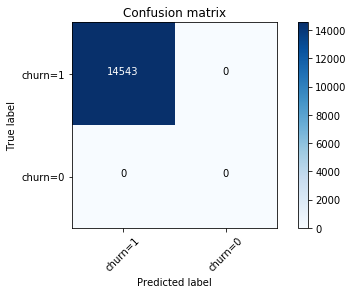

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [43]:
print(classification_report(y_test, yhat))
print(log_loss(y_test, yhat_prob))

              precision    recall  f1-score   support

           1       0.76      0.95      0.85     15331
           2       0.72      0.31      0.43      6521

   micro avg       0.76      0.76      0.76     21852
   macro avg       0.74      0.63      0.64     21852
weighted avg       0.75      0.76      0.72     21852

0.4757728828062968


In [156]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train, y_train.values.ravel())
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.48


In [45]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print(f1_score(y_test, yhat, average='weighted')) 
print(jaccard_similarity_score(y_test, yhat))
print(log_loss(y_test, yhat_prob))

0.7234743927640934
0.7583745194947831
0.4757728828062968


#### Support Vector Machine

In [29]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [50]:
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(Z, Y, test_size=0.2, random_state=4)
print ('Train set:', X_trainSVM.shape,  y_trainSVM.shape)
print ('Test set:', X_testSVM.shape,  y_testSVM.shape)

Train set: (87408, 43) (87408, 1)
Test set: (21852, 43) (21852, 1)


In [51]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainSVM, y_trainSVM.values.ravel()) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
yhatSVM = clf.predict(X_testSVM)
yhatSVM [0:5]

array([1, 1, 1, 1, 1])

In [46]:
yhat_probSVM = clf.predict_proba(X_testSVM)

AttributeError: predict_proba is not available when  probability=False

In [53]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print(f1_score(y_testSVM, yhatSVM, average='weighted')) 
print(jaccard_similarity_score(y_testSVM, yhatSVM))
print(log_loss(y_testSVM, yhat_probSVM))

0.7173579125834395
0.757550796265788


NameError: name 'yhat_probSVM' is not defined

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testSVM, yhatSVM, labels=[1,0]))

[[14699     0]
 [    0     0]]
